# AIRBNB PROJECT

CRISP-DM process

Cross Industry Standard Process for Data Mining

Phases
- Business Understanding
- Data Understanding
- Data Preparation
- Model Development
- Evaluation
- Deployment

Project Details/Instructions & Deliverables

'''
<!-- Key Steps for the Project
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

Pick a dataset, as mentioned on the previous page.

Pose at least three questions related to business or real-world applications of how the data could be used.

Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:
Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize
Provide a clear connection between your business questions and how the data answers them
Communicate your business insights:
Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience
Project Deliverables
There are two deliverables that are required for project completion.

A Github repository for your code.
A blog post of your findings.
Your Github repository must have the following contents:

A README.md file that communicates the libraries used, the motivation for the project, the files in the repository with a small description of each, a summary of the results of the analysis, and necessary acknowledgments.
Your code in a Jupyter notebook, with appropriate comments, analysis, and documentation.
You may also provide any other necessary documentation you find necessary.
For the blog post, pick a platform of your own choice. For example, it can be on your website, a Medium post (Josh's sample report(opens in a new tab) on How Do YOU Become A Developer?), or a Github blog post. Your blog** **must provide the following:

A clear and engaging title and image.
Your questions of interest.
Your findings for those questions with a supporting statistic(s), table, or visual.
Note: The post should not dive into technical details or difficulties of the analysis; this should be saved for Github. The post should be understandable for non-technical people from many fields. -->
'''

## Phases/Process

- Business Understanding
   * Motivation
I plan on renting an apartment in NYC(Manhattan) that is $\$3500$, I would prefer to leave alone and expect to travel at least one weekend every month. I need to find out using the public airbnb data if it is possible to make at least $\$500$ by posting the apartment on Airbnb on the weekend so my monthly out of pocket rent is $\$3000$

    * Questions
 
        * How much do apartments in NYC make on AirBnB?
        * What areas make the most?
        * What factors are most influential for pricing?

* Data Understanding

In [438]:
# importing necessary modules and reading the required files containing the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
%matplotlib inline

l_sum = pd.read_csv('../Data/summary_listings.csv')
review = pd.read_csv('../Data/Raw Data/reviews.csv')
n_sum = pd.read_csv('../Data/neighbourhoods.csv')
listing = pd.read_csv('../Data/Raw Data/listings.csv') 

In [439]:
listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20241104040953,2024-11-04,city scrape,Skylit Midtown Castle Sanctuary,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.27
1,6848,https://www.airbnb.com/rooms/6848,20241104040953,2024-11-04,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.69,4.58,NaN,f,1,1,0,0,1.04
2,6872,https://www.airbnb.com/rooms/6872,20241104040953,2024-11-04,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.03
3,6990,https://www.airbnb.com/rooms/6990,20241104040953,2024-11-04,city scrape,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",https://a0.muscache.com/pictures/be6cd5b3-9295...,16800,...,4.95,4.85,4.85,NaN,f,1,0,1,0,1.37
4,7064,https://www.airbnb.com/rooms/7064,20241104040953,2024-11-04,previous scrape,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",https://a0.muscache.com/pictures/13708959/7e74...,17297,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.08


In [440]:
list(listing.select_dtypes(include='number').columns)

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

In [441]:
list(listing.select_dtypes(exclude='number').columns)

['listing_url',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'price',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'license',
 'instant_bookable']

Univariate exploration

In [443]:
listing['price'] = listing['price'].replace({r'\$':'', ',':''}, regex=True).astype(float)

In [444]:
listing['price'].describe()

count    22741.000000
mean       216.737654
std        380.617571
min          8.000000
25%         85.000000
50%        149.000000
75%        250.000000
max      20000.000000
Name: price, dtype: float64

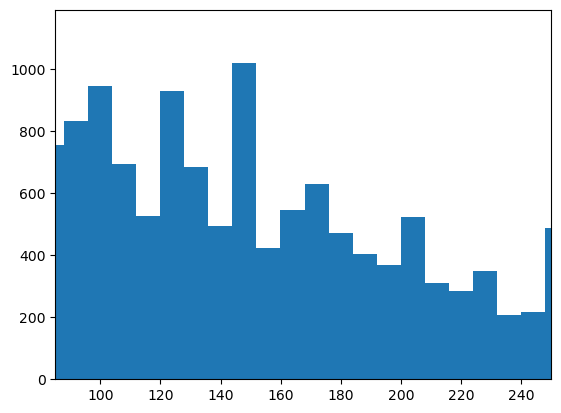

In [445]:
plt.hist(data=listing, x='price', bins=2500);
plt.xlim(85, 250);

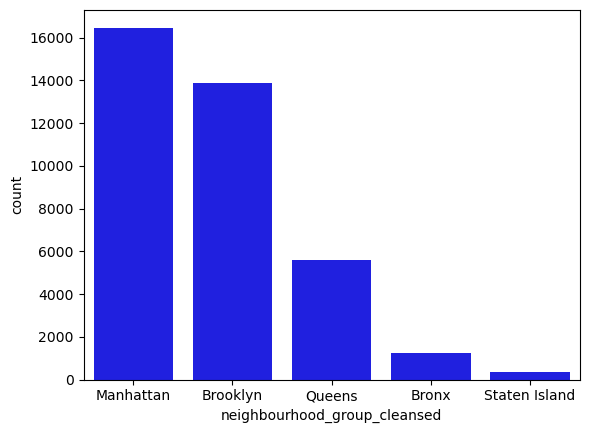

In [446]:
sns.countplot(data=listing, x='neighbourhood_group_cleansed', color='blue');

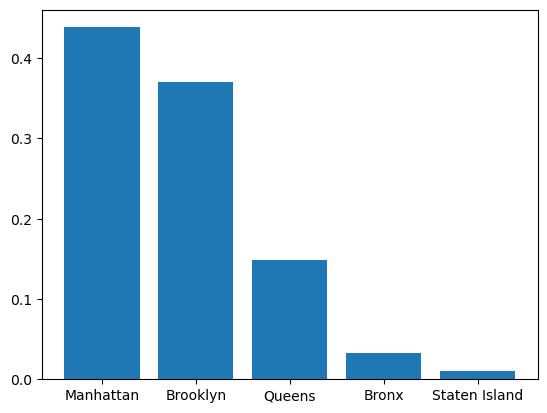

In [447]:
prop = (listing['neighbourhood_group_cleansed'].value_counts()/listing.shape[0]).reset_index()
plt.bar(prop['neighbourhood_group_cleansed'], height=prop['count']);

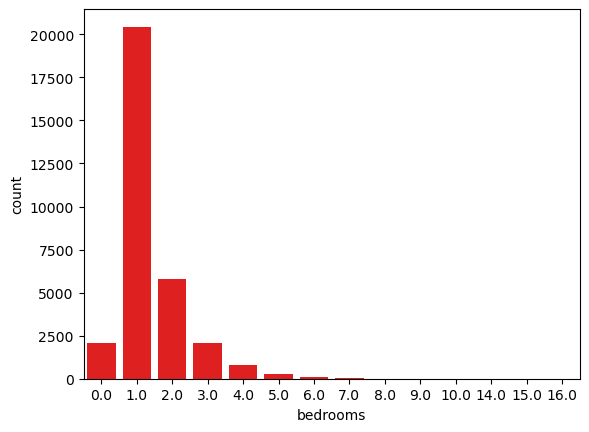

In [448]:
sns.countplot(data=listing, x='bedrooms', color='red');

Bivariate exploration

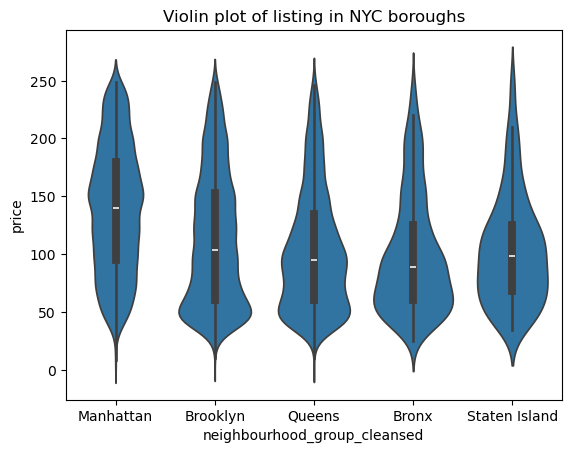

In [492]:
list_no_out = listing[listing['price'] < 250]
sns.violinplot(x=list_no_out['neighbourhood_group_cleansed'], y=list_no_out['price']);
plt.title('Violin plot of listing in NYC boroughs');

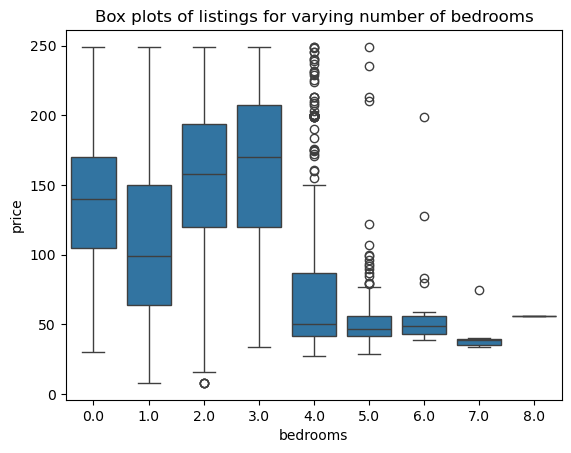

In [490]:
sns.boxplot(x=list_no_out['bedrooms'], y=list_no_out['price']);
plt.title('Box plots of listings for varying number of bedrooms');

Multivariate exploration

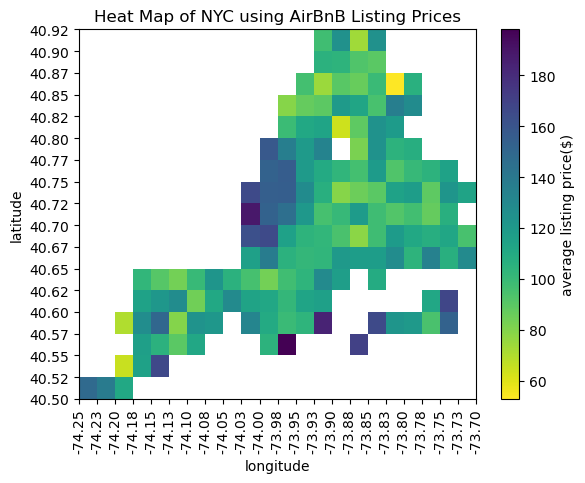

In [453]:
bins_x = np.arange(-74.251907, -73.713650+0.025, 0.025)
bins_y = np.arange(40.5, 40.911390+0.025, 0.025)

long_bins = pd.cut(list_no_out['longitude'], bins_x, right=False, include_lowest=False, labels=False)
lat_bins = pd.cut(list_no_out['latitude'], bins_y, right=False, include_lowest=False, labels=False)

n_points = list_no_out.groupby([long_bins, lat_bins]).size()

n_points = n_points.reset_index().pivot(index='latitude', columns='longitude').values

avg_price = list_no_out['price']/n_points[lat_bins, long_bins]

plt.hist2d(data=list_no_out, x='longitude', y='latitude', cmin=0.05, cmap='viridis_r', bins=[bins_x, bins_y], weights=avg_price);
plt.colorbar(label='average listing price($)');
plt.xlabel('longitude');
plt.ylabel('latitude');
plt.xticks(ticks=bins_x, labels=['{:0.2f}'.format(b) for b in bins_x], rotation=90);
plt.yticks(ticks=bins_y, labels=['{:0.2f}'.format(b) for b in bins_y]);
plt.title('Heat Map of NYC using AirBnB Listing Prices');

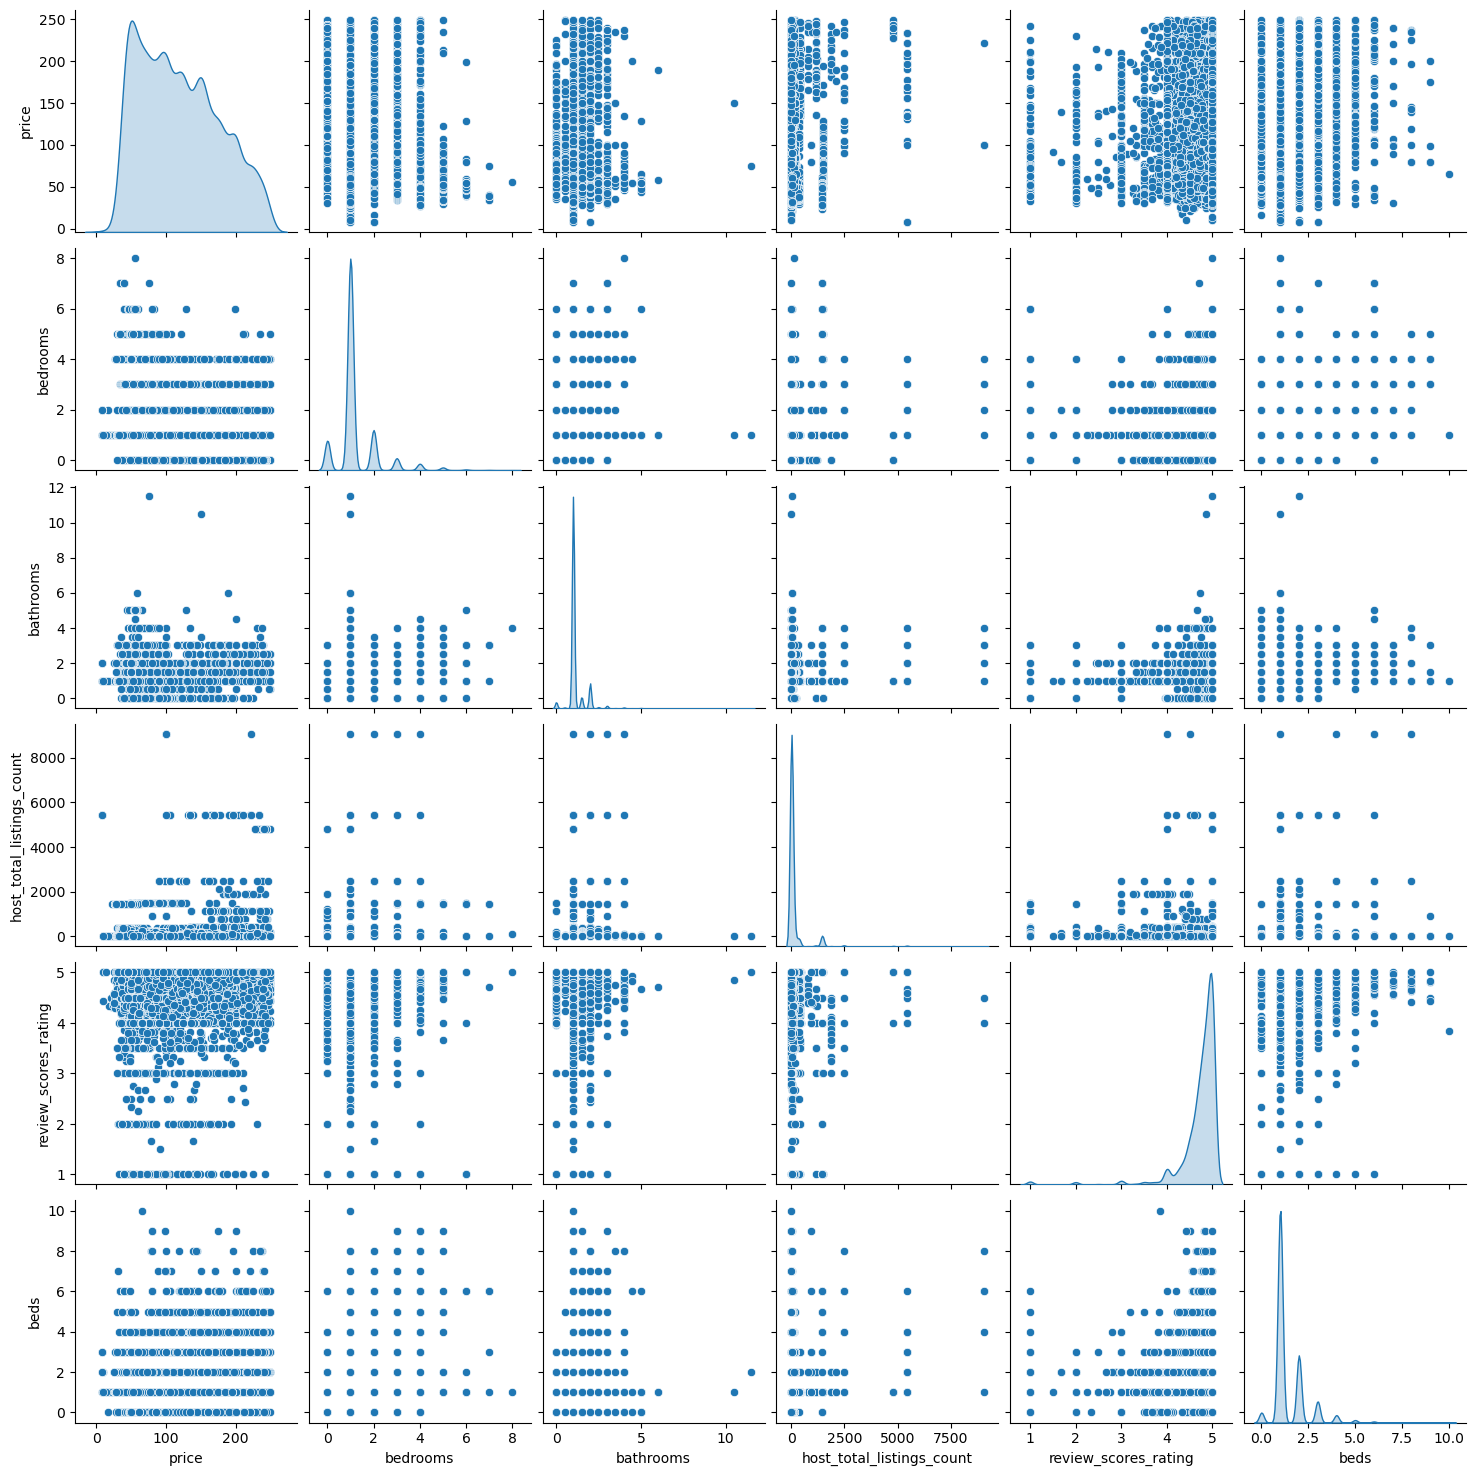

In [454]:
sns.pairplot(list_no_out[['price', 'bedrooms', 'bathrooms', 'host_total_listings_count', 'review_scores_rating', 'beds']], 
             diag_kind='kde');

Data Preparation

- From the data understanding phase, we have discovered a few things that need to be cleaned before further exploration

    - The price column needs to be stripped of the '$' and ','
    - The datatype of price column needs to be converted to float
    - There are outlier in the data that need to be dropped. A very small subset of the data range between 250 and 20000.

These have all been done and there is a new dataframe created named "list_no_out".

Model Development

In [458]:
#drop rows without a response variable value
df = list_no_out.dropna(subset = ['price'])

#drop rows and columns that are completely empty and have no impact
df = df.dropna(how='all', axis=1)
df = df.dropna(how='all')

In [459]:
#dropping columns that have no variability
dropped = ['id', 'host_id', 'host_about', 'host_thumbnail_url', 'host_url', 'host_picture_url', 'listing_url', 'name', 
           'description', 'neighborhood_overview', 'picture_url', 'host_name', 'host_since', 'amenities', 'first_review', 
           'last_review', 'license']

for col in df.columns:
    if len(df[col].unique()) == 1:
        dropped.append(col)

df = df.drop(columns=dropped)

In [460]:
#getting list of categorical variables to dummy
cat_var = list(df.select_dtypes(exclude = 'number').columns)
# cat_var.remove('host_since')

#Assigning the X matrix and the y vector
X = df.drop(columns='price')
y = df['price']

#getting numerical variables
num_var = list(X.select_dtypes(include = 'number').columns)

#getting dummy variables for the categorical columns
X = pd.get_dummies(X, columns=cat_var, dummy_na=True, prefix=cat_var, drop_first=True)

#filling nan with mean of the column
fillmean = lambda col: col.fillna(col.mean())
X = X.apply(fillmean, axis=0)

#dropping columns that have minimal variability
X = X.drop(columns = list(X.columns[X.sum()<50]))

In [461]:
#splitting the dataset to be modeled in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [462]:
#Creating a pipeline of steps for normalizing the features then instantiates the regression model
pipeline = Pipeline([
    ('normalizer', Normalizer()),
    ('model', LinearRegression()),
]);

#fitting the pipeline to training data
pipeline.fit(X_train, y_train)

#predicting the test data with the model
y_test_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

#R squared scores for evaluation
rtwo_train = r2_score(y_train, y_train_pred)
rtwo_test = r2_score(y_test, y_test_pred)

#printing result
print('The r squared for the train dataset is {}, while the r squared for the test dataset is {}'.format(rtwo_train, rtwo_test))

The r squared for the train dataset is 0.4373948981284693, while the r squared for the test dataset is 0.40323785263282197


Evaluation

In [464]:
coeffs_df = pd.DataFrame()
coeffs_df['predictor_variable'] = X_train.columns
coeffs_df['coeff'] = pipeline.named_steps['model'].coef_
coeffs_df['abs_coeff'] = abs(coeffs_df['coeff'])
coeffs_df = coeffs_df.sort_values('abs_coeff', ascending=False)

coeffs_df.head(40)

,predictor_variable,coeff,abs_coeff
42,host_response_time_nan,3.515316e+14,3.515316e+14
67,host_response_rate_nan,-3.515316e+14,3.515316e+14
69,host_acceptance_rate_24%,6.039672e+04,6.039672e+04
37,"host_location_Weehawken, NJ",5.336172e+04,5.336172e+04
209,neighbourhood_cleansed_Inwood,-2.849157e+04,2.849157e+04
50,host_response_rate_77%,2.318522e+04,2.318522e+04
244,neighbourhood_group_cleansed_Manhattan,2.278653e+04,2.278653e+04
74,host_acceptance_rate_46%,-2.228737e+04,2.228737e+04
238,neighbourhood_cleansed_Washington Heights,-2.194587e+04,2.194587e+04
46,host_response_rate_66%,-2.093273e+04,2.093273e+04
